In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load WDI data
df_wdi = pd.read_csv(r"C:\Users\Usuario\Downloads\gdp_perc_growth_2004_2024.csv", sep=";", decimal=',')
# Clean column names (remove '[YR...]')
df_wdi.columns = [
    col.split(' [')[0] if ' [' in col else col for col in df_wdi.columns
    ]
# Delete empty rows
df_wdi = df_wdi.dropna()
# Calculate average growth in these periods
df_wdi['Pre_Crisis_Growth (2004-2008)'] = df_wdi.loc[:, '2004':'2008'].mean(axis=1)
df_wdi['Recuperation_Growth (2009-2013)'] = df_wdi.loc[:, '2009':'2013'].mean(axis=1)
df_wdi['Stability_Growth (2014-2018)'] = df_wdi.loc[:, '2014':'2018'].mean(axis=1)
df_wdi['Recent_Growth (2019-2024)'] = df_wdi.loc[:, '2019':'2024'].mean(axis=1)
# Select relevant columns
results = df_wdi[
    ['Country Code', 'Pre_Crisis_Growth (2004-2008)', 'Recuperation_Growth (2009-2013)', 'Stability_Growth (2014-2018)', 'Recent_Growth (2019-2024)']
    ]
# See results limited to first 10 rows and rounded to 2 decimals
results.round(2)

,Country Code,Pre_Crisis_Growth (2004-2008),Recuperation_Growth (2009-2013),Stability_Growth (2014-2018),Recent_Growth (2019-2024)
0,USA,1.49,0.40,1.79,0.98
1,LUX,2.48,-0.85,0.28,-0.41
2,CHE,2.40,0.02,1.02,0.27
3,CHL,4.46,3.07,0.87,-0.68
4,POL,5.18,2.69,4.59,2.78
5,ETH,6.61,7.30,6.38,3.77
6,VNM,5.52,3.63,5.61,2.61
7,IRL,0.01,-0.78,5.07,1.63
8,GBR,1.27,-0.33,1.61,1.88
9,KOR,4.22,2.80,2.08,1.33


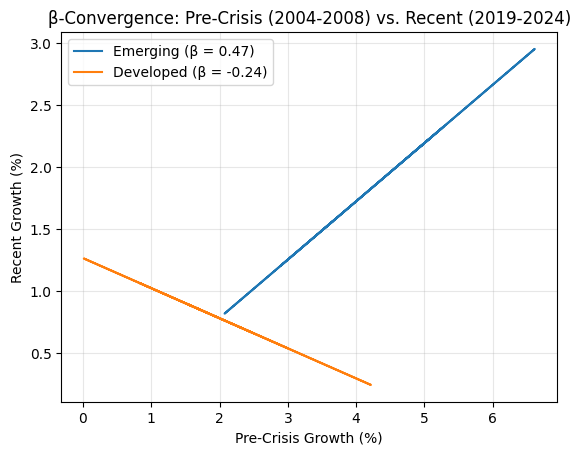

In [24]:
# Group countries by emerging or developed
emerging = ['CHL', 'POL', 'ETH', 'VNM', 'IND', 'EGY', 'IDN', 'PER', 'MAR', 'PHL', 'NGA', 'BGD', 'PAK', 'MOZ']
developed = ['USA', 'CHE', 'LUX', 'GBR', 'KOR', 'IRL', 'DEU', 'ESP', 'JPN', 'CAN', 'AUS', 'NOR', 'NLD', 'DNK', 'SWE', 'FIN']
df_wdi['Group'] = df_wdi['Country Code'].apply(
    lambda x: 'Emerging' if x in emerging else 'Developed'
    )

# Definir qué columnas usar para X e Y
x_col = 'Pre_Crisis_Growth (2004-2008)'  # Exogenous variable
y_col = 'Recent_Growth (2019-2024)'      # Endogenous variable

# Linear regression by group
for group in ['Emerging', 'Developed']:
    subset = df_wdi[df_wdi['Group'] == group]
    X = subset[[x_col]]
    y = subset[y_col]
    beta_conv_model = LinearRegression().fit(X,y) 
    plt.plot(
        X, beta_conv_model.predict(X), 
        linestyle='-', 
        label = f'{group} (β = {beta_conv_model.coef_[0]:.2f})'
        )

# Modify graph
plt.title('β-Convergence: Pre-Crisis (2004-2008) vs. Recent (2019-2024)')
plt.xlabel('Pre-Crisis Growth (%)')
plt.ylabel('Recent Growth (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

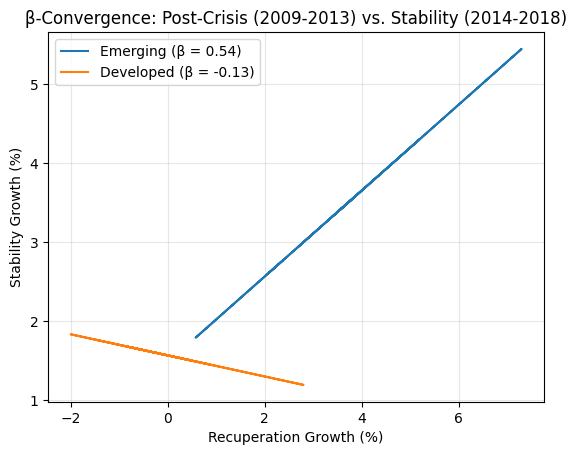

In [ ]:
# Define columns for X and Y
x_col = 'Recuperation_Growth (2009-2013)' 
y_col = 'Stability_Growth (2014-2018)'

# Linear regression by group
for group in ['Emerging', 'Developed']:
    subset = df_wdi[df_wdi['Group'] == group]
    X = subset[[x_col]]
    y = subset[y_col]
    beta_conv_model = LinearRegression().fit(X,y) 
    plt.plot(
        X, beta_conv_model.predict(X), 
        linestyle='-', 
        label = f'{group} (β = {beta_conv_model.coef_[0]:.2f})'
        )
    
# Modify graph
plt.title('β-Convergence: Post-Crisis (2009-2013) vs. Stability (2014-2018)')
plt.xlabel('Recuperation Growth (%)')
plt.ylabel('Stability Growth (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

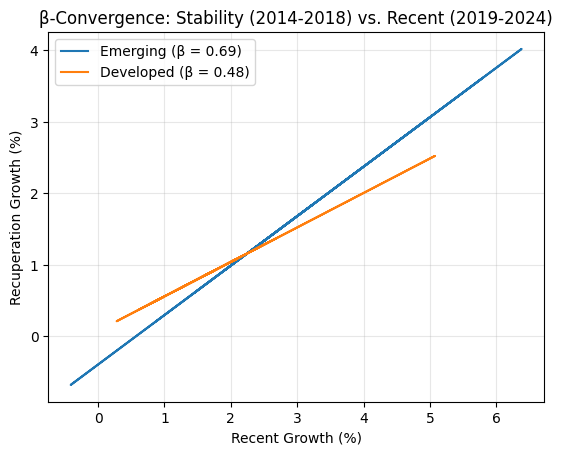

In [27]:
# Definir qué columnas usar para X e Y
x_col = 'Stability_Growth (2014-2018)'
y_col = 'Recent_Growth (2019-2024)'

# Linear regression by group
for group in ['Emerging', 'Developed']:
    subset = df_wdi[df_wdi['Group'] == group]
    X = subset[[x_col]]
    y = subset[y_col]
    model = LinearRegression().fit(X,y) 
    plt.plot(
        X, model.predict(X), 
        linestyle='-', 
        label = f'{group} (β = {model.coef_[0]:.2f})'
        )

# Modify graph
plt.title('β-Convergence: Stability (2014-2018) vs. Recent (2019-2024)')
plt.xlabel('Recent Growth (%)')
plt.ylabel('Recuperation Growth (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()